In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = r"C:\Users\Lenovo\Documents\Data"

customer = pd.read_csv(data + '\\Customer_Acqusition.csv')
repayment = pd.read_csv(data + '\\Repayment.csv')
spend = pd.read_csv(data + '\\spend.csv')


In [3]:
customer.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed


In [4]:
repayment.head(1)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN


In [5]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [6]:
print(customer.shape)
print(repayment.shape)
print(spend.shape)

(100, 8)
(1523, 5)
(1500, 5)


### Null values treatment


In [7]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [8]:
repayment.isnull().sum()

SL No:          24
Customer        23
Month           23
Amount          23
Unnamed: 4    1523
dtype: int64

In [9]:
spend.isnull().sum()

Sl No:      0
Customer    0
Month       0
Type        0
Amount      0
dtype: int64

In [10]:
# Dropping null values
repayment.drop(axis= 1 , columns=['Unnamed: 4','SL No:'], inplace= True)
repayment.dropna(inplace= True )

In [11]:
repayment.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

In [12]:
repayment.shape

(1500, 3)

### Data types conversion

In [13]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [14]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [15]:
repayment.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

In [16]:
# changing Month to datetime from object type
spend['Month'] = pd.to_datetime(spend['Month' ] )
repayment['Month'] = pd.to_datetime(repayment['Month'])

## 1. In the above dataset,
#### a. In case age is less than 18, replace it with mean of age values.

In [17]:
customer.loc[customer['Age'] < 18 , 'Age'] = customer.Age.mean()

In [18]:
customer.loc[customer['Age'] < 18 , 'Age']

Series([], Name: Age, dtype: float64)

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [19]:
cust_spend =  pd.merge(customer, spend , on= 'Customer',  how =  'inner' )
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13


In [20]:
cust_spend.loc[cust_spend['Amount'] > cust_spend['Limit'] , 'Amount'] =  cust_spend.Limit /2

In [21]:
cust_spend.loc[cust_spend['Amount'] > cust_spend['Limit'] , 'Amount']

Series([], Name: Amount, dtype: float64)

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [22]:
cust_repayment =  pd.merge(repayment, customer, on= 'Customer', how= 'outer')
cust_repayment.head(2)

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [23]:
cust_repayment.loc[cust_repayment.Amount > cust_repayment.Limit, 'Amount'] = cust_repayment.Limit

In [24]:
cust_repayment.loc[cust_repayment.Amount > cust_repayment.Limit, 'Amount']

Series([], Name: Amount, dtype: float64)

## 2. From the above dataset create the following summaries:
### a. How many distinct customers exist?

In [25]:
print('No. of unique customer are ' ,customer.Customer.nunique())

No. of unique customer are  100


### b. How many distinct categories exist?

In [26]:
print('No. of unique category are ' ,customer.Segment.nunique())

No. of unique category are  5


### c. What is the average monthly spend by customers?

In [27]:
spend['Monthly'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x , format = '%B'))
spend['Year'] = spend['Month'].apply(lambda x: pd.Timestamp.strftime(x , format = '%Y'))

In [28]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount,Monthly,Year
0,1,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,2,A1,2004-01-03,PETRO,410556.13,January,2004


In [29]:
round(spend.groupby(['Monthly','Year'])[['Amount']].mean().reset_index(),2)

,Monthly,Year,Amount
0,April,2004,235272.04
1,April,2005,252181.33
2,April,2006,232468.97
3,August,2005,233734.63
4,August,2006,240699.72
5,December,2005,147503.06
6,December,2006,270470.98
7,February,2004,221215.27
8,February,2005,229802.28
9,February,2006,253858.26


### d. What is the average monthly repayment by customers?

In [30]:
repayment['Monthly'] = repayment.Month.apply(lambda x: pd.Timestamp.strftime(x, format = "%B"))
repayment['Year'] = repayment.Month.apply(lambda x: pd.Timestamp.strftime(x, format = "%Y"))

In [31]:
repayment.head(2)

,Customer,Month,Amount,Monthly,Year
0,A1,2004-01-12,495414.75,January,2004
1,A1,2004-01-03,245899.02,January,2004


In [32]:
round(repayment.groupby(['Monthly', 'Year'])[['Amount']].mean().reset_index(),2)

,Monthly,Year,Amount
0,April,2004,259141.68
1,April,2005,212688.63
2,April,2006,275472.25
3,August,2005,264430.92
4,August,2006,224143.99
5,December,2005,320379.34
6,December,2006,252736.57
7,February,2004,256702.63
8,February,2005,238829.27
9,February,2006,284489.57


###  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [33]:
cust_spend_repay= pd.merge( cust_spend , repayment , on='Customer', how = 'inner')
cust_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004


In [34]:
cust_spend_repay.rename(columns={'Month_x' : 'Month_spend','Amount_x' : 'Amount_spend',
                                 'Month_y': 'Month_repay', 'Amount_y':'Amount_repay'}, inplace= True)

In [35]:
cust_spend_repay.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month_spend,Type,Amount_spend,Month_repay,Amount_repay,Monthly,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004


In [36]:
interest = cust_spend_repay.groupby(['Monthly', 'Year'])[['Amount_spend', 'Amount_repay']].sum().reset_index()
interest.head(2)

,Monthly,Year,Amount_spend,Amount_repay
0,April,2004,1.194516e+08,2.285403e+08
1,April,2005,9.366405e+07,1.747894e+08


In [37]:
interest['monthly_profit'] = interest['Amount_repay'] - interest['Amount_spend']
interest.head(2)

,Monthly,Year,Amount_spend,Amount_repay,monthly_profit
0,April,2004,1.194516e+08,2.285403e+08,1.090887e+08
1,April,2005,9.366405e+07,1.747894e+08,8.112539e+07


In [38]:
interest['Interest_gain'] = (interest['monthly_profit']*2.9)/100

In [39]:
interest

,Monthly,Year,Amount_spend,Amount_repay,monthly_profit,Interest_gain
0,April,2004,1.194516e+08,2.285403e+08,1.090887e+08,3.163572e+06
1,April,2005,9.366405e+07,1.747894e+08,8.112539e+07,2.352636e+06
2,April,2006,3.229722e+08,6.093666e+08,2.863944e+08,8.305437e+06
3,August,2005,1.361400e+08,2.477449e+08,1.116049e+08,3.236542e+06
4,August,2006,5.849630e+07,7.167032e+07,1.317402e+07,3.820465e+05
5,December,2005,4.348638e+07,9.944533e+07,5.595895e+07,1.622810e+06
6,December,2006,4.585222e+07,7.087702e+07,2.502480e+07,7.257193e+05
7,February,2004,7.613922e+07,1.602419e+08,8.410268e+07,2.438978e+06
8,February,2005,5.890557e+08,9.416163e+08,3.525606e+08,1.022426e+07
9,February,2006,1.654843e+08,2.903280e+08,1.248436e+08,3.620465e+06


### f. What are the top 5 product types?

In [40]:
product_type = spend.groupby('Type')[["Amount"]].sum().sort_values(by= 'Amount', ascending = False)
product_type.head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


### g. Which city is having maximum spend?

In [41]:
cust_spend.groupby('City')[["Amount"]].sum().sort_values(by= 'Amount', ascending = False)


,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


In [42]:
print("From the above data we can say that COCHIN city has the maximum spending")

From the above data we can say that COCHIN city has the maximum spending


### h. Which age group is spending more money?

In [43]:
cust_spend['Age_group'] = pd.cut(cust_spend['Age'], bins = np.arange(18,98,10), 
                                  labels= ['18-28','29-38','39-48','49-58','59-68','69-78','79-88'])
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,69-78
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,69-78


In [44]:
cust_spend.groupby('Age_group')[['Amount']].sum().sort_values(by='Amount', ascending = False)

,Amount
Age_group,
39-48,52350765.92
18-28,44458290.95
29-38,40669446.09
49-58,32043137.38
69-78,28731480.99
59-68,20623443.21
79-88,904520.69


In [45]:
print("From the above data we can say that age group 39-48 is spending more money")

From the above data we can say that age group 39-48 is spending more money


### i. Who are the top 10 customers in terms of repayment?

In [46]:
repayment.groupby('Customer')[['Amount']].sum().sort_values(by='Amount', ascending = False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


## 3. Calculate the city wise spend on each product on yearly basis. Also include a graphicalrepresentation for the same.

In [47]:
cust_spend['Year'] = cust_spend['Month'].apply(lambda x : pd.Timestamp.strftime(x, format = '%Y'))
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,69-78,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,69-78,2004


In [48]:
cust_pivot = cust_spend.pivot_table(values='Amount', index=['City','Year'] , columns= 'Product', aggfunc='sum')
cust_pivot

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

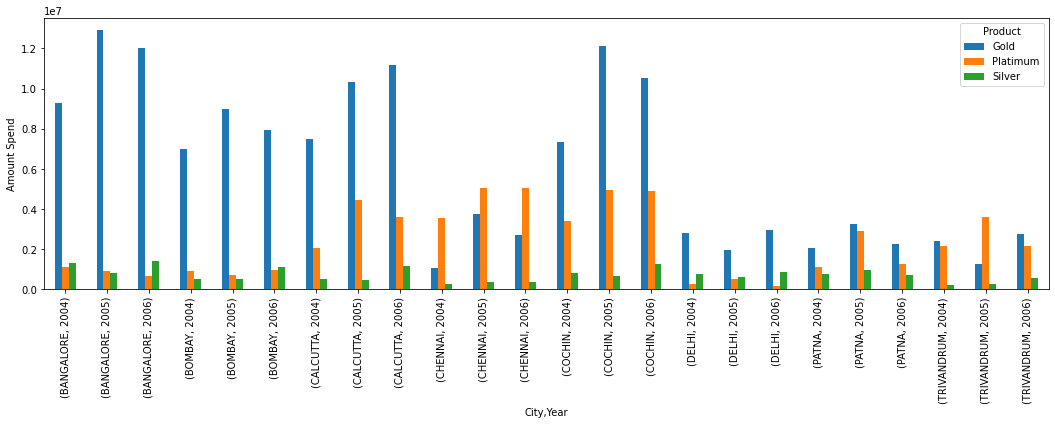

In [49]:
cust_pivot.plot(kind= 'bar' , figsize = (18,5) )
plt.ylabel('Amount Spend')
plt.show()

## 4. Create graphs for
### a. Monthly comparison of total spends, city wise

In [50]:
cust_spend['Monthly'] = cust_spend['Month'].apply(lambda x : pd.Timestamp.strftime(x , format= '%B'))
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,69-78,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,69-78,2004,January


In [51]:
monthly_city = cust_spend.pivot_table(values= 'Amount', index=[ 'Monthly'], columns='City', aggfunc='sum')
monthly_city

City,BANGALORE,BOMBAY,CALCUTTA,CHENNAI,COCHIN,DELHI,PATNA,TRIVANDRUM
Monthly,,,,,,,,
April,4207980.48,1873785.01,3457507.95,2518656.99,3882744.94,777240.75,2338179.53,1199293.45
August,695061.95,1066744.75,1548354.02,305875.97,2317306.61,155402.16,419383.64,453773.94
December,422167.24,140040.71,55001.50,223628.27,909533.05,842342.02,50000.00,640922.26
February,6734494.76,4276988.30,8150545.61,4385815.95,5747886.38,1494064.06,2353333.55,2857123.89
January,9041796.84,5948993.33,9064864.90,4466961.36,11714373.54,2714261.45,4916205.55,3704336.99
July,2228217.69,177726.32,2234573.27,693825.77,1290897.30,50001.50,50000.00,260484.50
June,1330685.90,1172594.97,2293045.81,1244242.16,2495745.07,511276.09,746186.13,400336.83
March,5362903.07,5227850.50,4939040.04,3183643.71,5645146.53,2267149.02,1437166.61,2392316.51
May,6383115.13,3891945.60,5578246.87,2856199.62,6581085.69,1600322.07,2136586.80,2813534.48


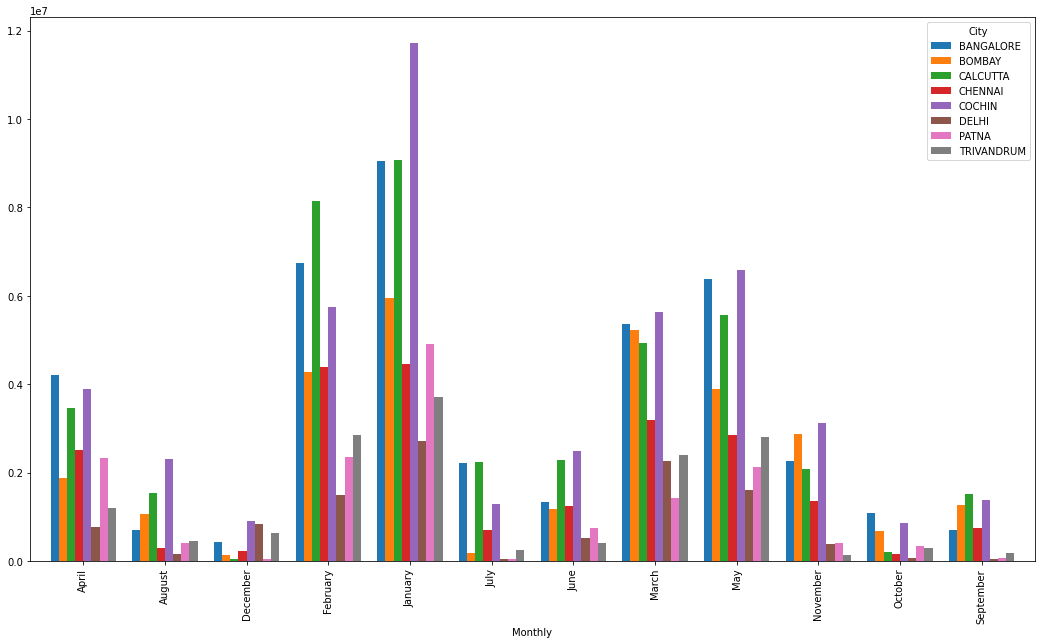

In [52]:
monthly_city.plot(kind = 'bar', figsize=(18,10) ,width=0.8)
plt.show()

### b. Comparison of yearly spend on air tickets

In [53]:
yearly_type = cust_spend.pivot_table( values='Amount' , index = 'Type' , columns='Year',  aggfunc='sum').reset_index()
yearly_type.head(2)

Year,Type,2004,2005,2006
0,AIR TICKET,4357225.35,10550152.21,5248469.56
1,AUTO,254745.28,1192725.78,3358589.35


In [54]:
air_ticket = yearly_type.loc[yearly_type['Type'] == 'AIR TICKET']

In [55]:
air_ticket

Year,Type,2004,2005,2006
0,AIR TICKET,4357225.35,10550152.21,5248469.56


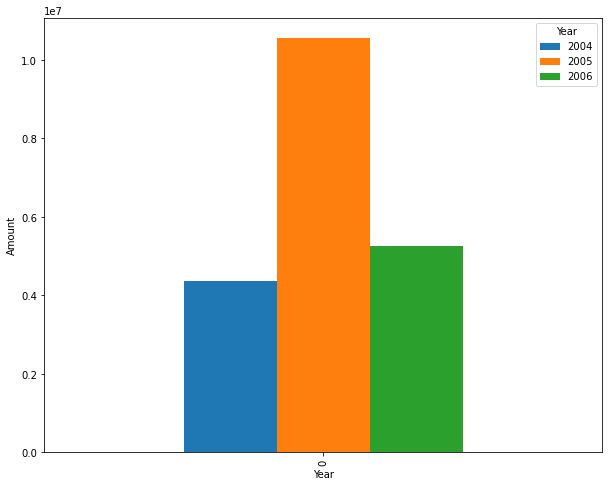

In [56]:
air_ticket.plot(kind= 'bar' , figsize = (10,8))
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

### c. Comparison of monthly spend for each product

In [57]:
cust_spend.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_group,Year,Monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,69-78,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,69-78,2004,January


In [58]:
monthly_product = pd.pivot_table(cust_spend ,values= 'Amount', index= 'Monthly', columns='Product', aggfunc='sum' ).sort_values(by = 'Monthly')
monthly_product

Product,Gold,Platimum,Silver
Monthly,,,
April,13170572.59,5182493.86,1902322.65
August,4954030.42,1714762.80,293109.82
December,2332940.96,750156.19,200537.90
February,24779179.55,9134054.58,2087018.37
January,32413831.83,14951578.51,4206383.62
July,5167416.37,1288156.26,530153.72
June,6538862.64,2965712.71,689537.61
March,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


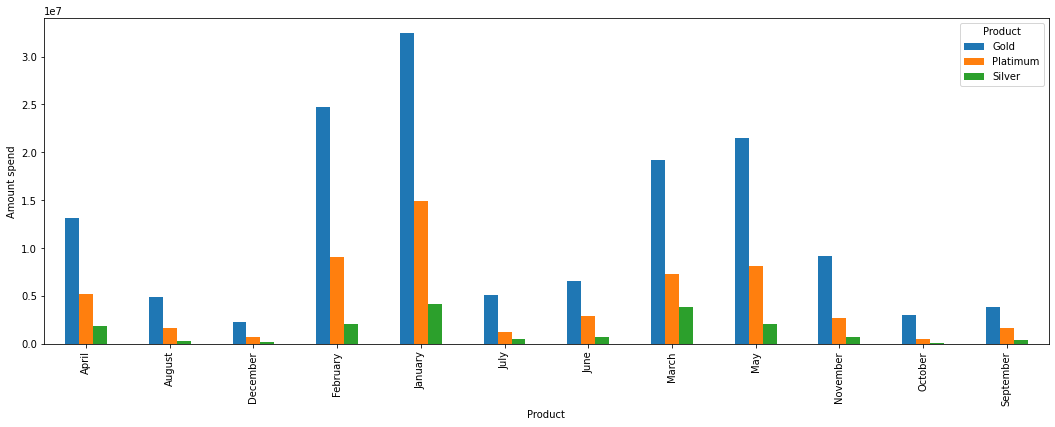

In [59]:
monthly_product.plot(kind = 'bar', figsize = (18,6))
plt.ylabel('Amount spend')
plt.xlabel('Product')
plt.show()

In [60]:
print('Sales at the starting months of the year is more as compare to the ending months'  )

Sales at the starting months of the year is more as compare to the ending months


## 5. Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [61]:
cust_repayment.head(2)

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [62]:
cust_repayment['Year'] = cust_repayment['Month'].apply( lambda x : pd.Timestamp.strftime(x , '%Y'))
cust_repayment['Monthly'] =  cust_repayment['Month'].apply( lambda x : pd.Timestamp.strftime(x , '%B'))

In [63]:
cust_repayment.head(2)

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Year,Monthly
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004,January


In [64]:
def summary_report(product, timeperiod):
    print('The below summary report is for the product', product,'and the time period is', timeperiod)
    if product.lower()== 'gold' and timeperiod.lower()== 'year' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Year'] , aggfunc='sum')
        result = pivot.loc['Gold',:]
        
    elif product.lower()== 'gold' and timeperiod.lower()== 'monthly' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Monthly'] , aggfunc='sum')
        result = pivot.loc['Gold',:]
        
    elif product.lower()== 'silver' and timeperiod.lower()== 'year' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Year'] , aggfunc='sum')
        result = pivot.loc['Silver',:]
        
    elif product.lower()== 'silver' and timeperiod.lower()== 'monthly' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Monthly'] , aggfunc='sum')
        result = pivot.loc['Silver',:]
        
    elif product.lower()== 'platimum'and timeperiod.lower()== 'monthly' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Monthly'] , aggfunc='sum')
        result = pivot.loc['Platimum',:]
        
    elif product.lower()== 'platimum' and timeperiod.lower()== 'year' :
        pivot = cust_repayment.pivot_table( values= 'Amount' , index=['Product', 'City', 'Customer'] , columns=[ 'Year'] , aggfunc='sum')
        result = pivot.loc['Platimum',:]
        
    return result

In [65]:
summary_report('platimum', 'year')

The below summary report is for the product platimum and the time period is year


Year                       2004        2005        2006
City       Customer                                    
BANGALORE  A19         50000.00    70000.00    80000.00
           A37        770552.62  1031641.04   893364.91
           A5          68809.07    57286.60    40008.00
           A52        263853.18   769849.81   600012.00
BOMBAY     A33         12275.98    40008.00    80016.00
           A36        772335.72   856921.95  1100022.00
           A4          30003.00    40004.00    40004.00
           A51        423029.79   459351.63   526425.98
           A70              NaN    20002.00         NaN
           A71         10002.00    10002.00         NaN
CALCUTTA   A20         70007.00    60006.00    70007.00
           A34         81344.52   372832.64   676907.97
           A40       2576916.73  2527720.55  1886111.99
           A49        100020.00   130026.00    80016.00
           A69              NaN    10000.00    10000.00
           A98         10001.00         NaN         NaN
           A99         10002.00         NaN         NaN
CHENNAI    A38       1951311.01  2408626.65  3111018.69
           A47         60000.00   160000.00    90000.00
           A56         36537.90   966666.69  3295868.87
COCHIN     A21        110022.00   140028.00    80016.00
           A3          30000.00    50000.00    30000.00
           A35         31811.80   430194.67   800008.00
           A41       1752953.17  2486187.34  1241458.03
           A50        325086.07   338057.45   900000.00
           A54        490081.00  1829813.48  3255687.64
           A83              NaN         NaN    10002.00
DELHI      A53        440318.31   679941.09   450320.75
PATNA      A55        335081.18   708035.12  2874384.90
TRIVANDRUM A39       1342503.16  3699578.97  2580401.17
           A48         70007.00   140014.00   100010.00
           A97         10000.00         NaN         NaN